<a href="https://colab.research.google.com/github/Manika7777/CSI_WEEK6_MS/blob/main/Model_Evaluation_and_Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Load the Dataset*

In [2]:
import pandas as pd

df = pd.read_csv("/content/archive (3).zip")
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# *Convert Target Variable and Drop Irrelevant Columns*

In [3]:
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df.drop(columns=['id', 'dataset', 'num'], inplace=True)


# *Data Cleaning: Handling Missing Values*

In [4]:
# Drop 'ca', 'thal', 'slope' due to too many missing values
df.drop(columns=['ca', 'thal', 'slope'], inplace=True)

# Fill numeric missing with median
df['trestbps'].fillna(df['trestbps'].median(), inplace=True)
df['chol'].fillna(df['chol'].median(), inplace=True)
df['thalch'].fillna(df['thalch'].median(), inplace=True)
df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)

# Fill categorical with mode
df['fbs'].fillna(df['fbs'].mode()[0], inplace=True)
df['restecg'].fillna(df['restecg'].mode()[0], inplace=True)
df['exang'].fillna(df['exang'].mode()[0], inplace=True)


/tmp/ipython-input-4-2818658218.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['trestbps'].fillna(df['trestbps'].median(), inplace=True)
/tmp/ipython-input-4-2818658218.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

# *Categorical Encoding*

In [5]:
df_encoded = pd.get_dummies(df, drop_first=True)


# *Train-Test Split and Feature Scaling*

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_encoded.drop("target", axis=1)
y = df_encoded["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# *Model Training and Evaluation*

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}:\n", classification_report(y_test, y_pred))



Logistic Regression:
               precision    recall  f1-score   support

           0       0.74      0.79      0.76        75
           1       0.85      0.81      0.83       109

    accuracy                           0.80       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.80      0.80      0.80       184


Random Forest:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80        75
           1       0.87      0.85      0.86       109

    accuracy                           0.84       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184


SVM:
               precision    recall  f1-score   support

           0       0.72      0.83      0.77        75
           1       0.87      0.78      0.82       109

    accuracy                           0.80       184
   macro avg       0.79      0.80      0.80       184
weighted avg       0.81    

# *Hyperparameter Tuning using GridSearchCV*

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

best_rf = grid.best_estimator_
y_pred = best_rf.predict(X_test)
print("\nBest Random Forest:\n", classification_report(y_test, y_pred))


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150}

Best Random Forest:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        75
           1       0.89      0.85      0.87       109

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.85      0.85       184



# *Confusion Matrix*

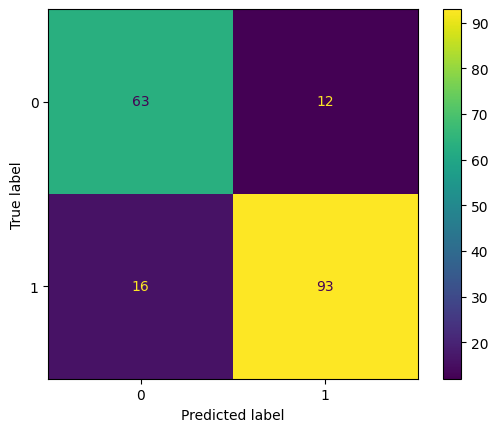

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test)


# *Accuracy Comparison of All Models*

In [11]:
from sklearn.metrics import accuracy_score

# Accuracy for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.2f}")


Logistic Regression Accuracy: 0.80
Random Forest Accuracy: 0.84
SVM Accuracy: 0.80


# *Accuracy Comparison Bar Chart*

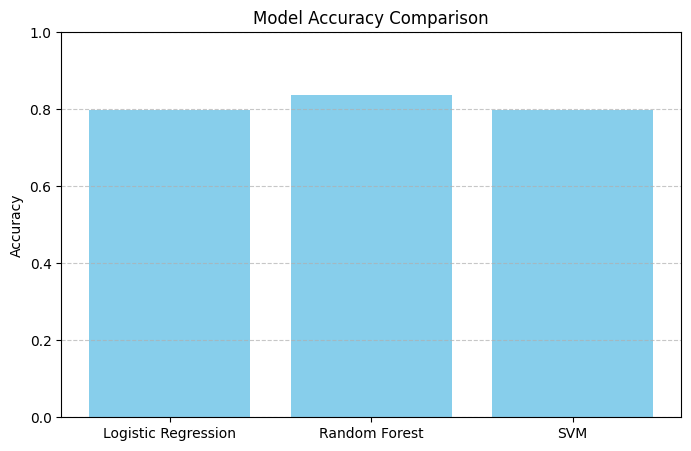

In [12]:
import matplotlib.pyplot as plt

# Store accuracies
accuracy_scores = {}

# Compute accuracy for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = acc

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# *Confusion Matrix Heatmaps for All Models*

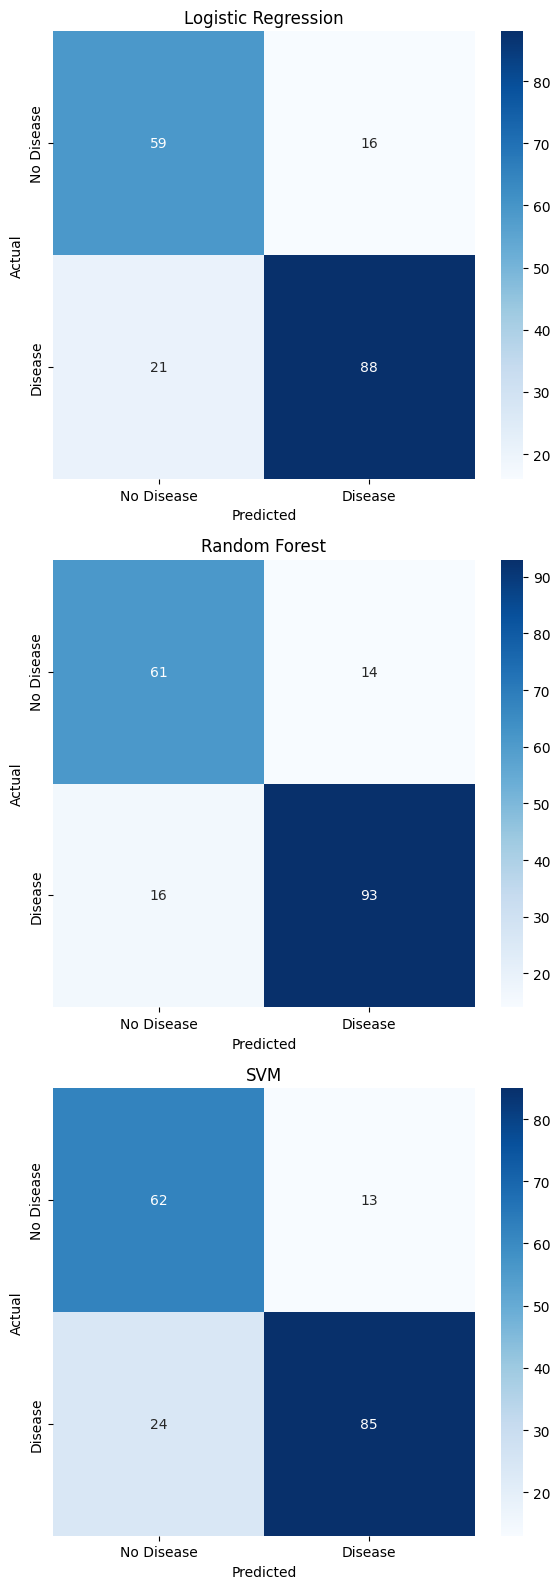

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model_names = list(models.keys())

plt.figure(figsize=(6, 16))  # Narrower width, taller height

# Plot confusion matrix for each model vertically
for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.subplot(3, 1, i + 1)  # 3 rows, 1 column
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["No Disease", "Disease"],
                yticklabels=["No Disease", "Disease"])
    plt.title(f"{name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()


# *ROC Curve and AUC Score*

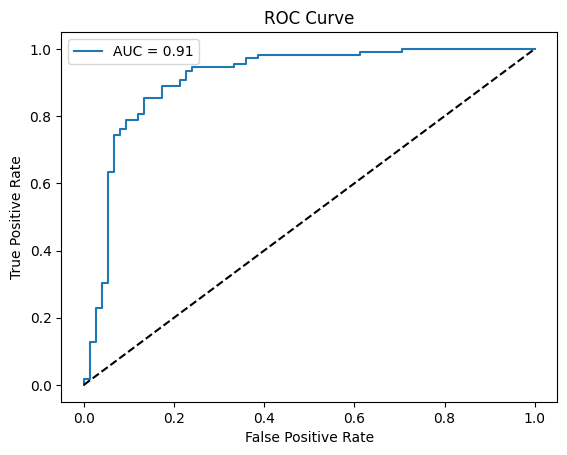

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_proba = best_rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# *Feature Importance*

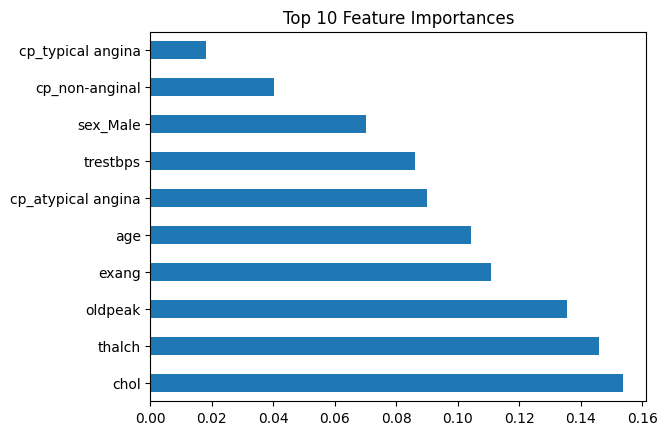

In [17]:
import seaborn as sns

importances = pd.Series(best_rf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()


# *Cross-Validation*

In [18]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_rf, X, y, cv=5, scoring='f1')
print("F1 Cross-Validation Scores:", scores)
print("Mean F1 Score:", scores.mean())


F1 Cross-Validation Scores: [0.72727273 0.72043011 0.86294416 0.89400922 0.74903475]
Mean F1 Score: 0.7907381925721536


# *Save the Trained Model*

In [19]:
import joblib
joblib.dump(best_rf, "heart_disease_model.pkl")


['heart_disease_model.pkl']